In [42]:
import os

if not os.getcwd().endswith('Dissertation'):
    os.chdir('..')

In [43]:
import pandas as pd
import numpy as np
from glob import glob

session = 'Q2'

mercedes_error = []
model_error = []
model_std = []
stds = []
for year in [2019, 2020]:
    with open(f'Data\\test_csv\\mercedes_{year}.txt', 'r') as f:
        mercedes_error += [float(i.rstrip().split(' ')[int(session[1])-1]) for i in f.readlines()]
    for path in glob(f'Data\\test_csv\\{year}_results\\*.csv'):
        data = pd.read_csv(path)
        q1_mean = np.mean(np.abs(data[f'{session}_means']) - data[f'{session}_cutoff'].unique()[0])
        q1_std = np.mean(data[f'{session}_stds'])
        stds.append(q1_std)
        model_error.append(q1_mean)
        model_std.append(1.96*q1_std)

print(np.mean(model_error))
print(np.mean(stds))
print(np.std(stds))

-0.12769901063895953
0.18163319710340442
0.08095963587667358


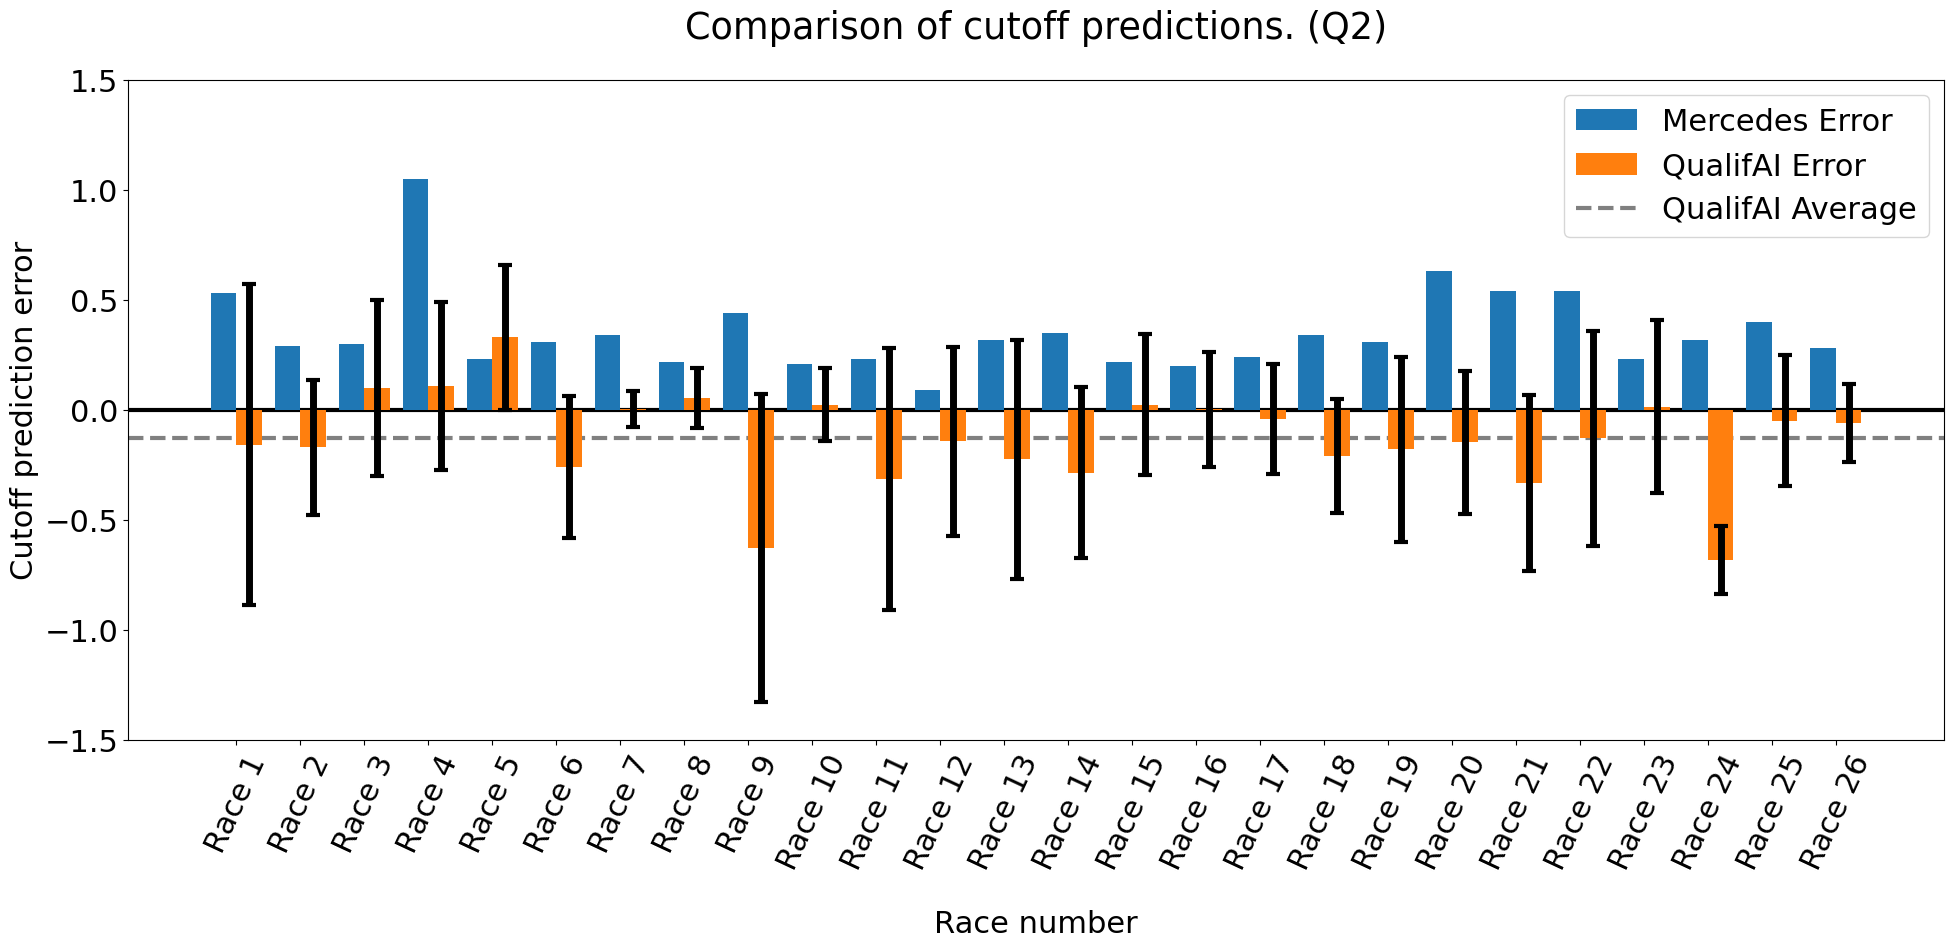

In [44]:
import matplotlib.pyplot as plt


x = np.arange(len(mercedes_error)) * 10

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
width = 4
rects1 = ax.bar(x-(width/2), mercedes_error,width=width, align='center')
if session == 'Q1':
    rects2 = ax.bar(x+(width/2), model_error, width=width, align='center')
else:
    rects2 = ax.bar(x+(width/2), model_error, yerr=model_std, error_kw=dict(lw=5, capsize=5, capthick=3), width=width, align='center')

average = np.mean(model_error)
ax.set_ylim([-1.5, 1.5])
ax.set_yticks(np.array([-1.5, -1, -0.5, 0, 0.5, 1.0, 1.5]))
ax.set_xticks(x)
ax.set_xticklabels([f'Race {i + 1}' for i in range(len(mercedes_error))],
                   rotation=65)
av_line = ax.axhline(y=average , zorder=0, color='grey', ls='--', lw=3)
ax.axhline(y=0 , zorder=0, color='black', lw=3)

ax.legend((rects1[0], rects2[0], av_line), ('Mercedes Error', 'QualifAI Error', 'QualifAI Average'))



plt.title(f'Comparison of cutoff predictions. ({session})', y=1.05)
plt.ylabel('Cutoff prediction error')
plt.xlabel('Race number', labelpad=25)
plt.tight_layout()
plt.savefig(f'Data\\plots\\cutoff_comparison_{session}.png')
plt.show()